In [1]:
# 라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 그래프상에서 한글을 나타내기 위해 korean_mat 설치
! pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기
df = pd.read_csv('/Users/gimdogyun/Desktop/빅데이터_애널리틱스_프로젝트/Big_analytics_project/movie_finished_toFDA_V9.csv')
df.head()


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


,naver_movie_code,kobis_movie_code,movie_title,release_date,DoW_release,Date,DoW,MoY,D_D,DailyTotal,...,국적평균누적관객수,국적평균스크린수,등급평균관객수,등급평균누적관람객수,등급평균스크린수,7days_before,5days_before,Day_of_release,5days_after,7days_after
0,107374,20142641,나를 잊지 말아요,2016.1.7,Thursday,2016.1.7,Thursday,January,0,612,...,859493,95,9090,596341,79,11,11,13,6,33
1,107374,20142641,나를 잊지 말아요,2016.1.7,Thursday,2016.1.8,Friday,January,1,332,...,859493,95,9090,596341,79,11,11,13,6,33
2,107374,20142641,나를 잊지 말아요,2016.1.7,Thursday,2016.1.9,Saturday,January,2,394,...,859493,95,9090,596341,79,11,11,13,6,33
3,107374,20142641,나를 잊지 말아요,2016.1.7,Thursday,2016.1.10,Sunday,January,3,205,...,859493,95,9090,596341,79,11,11,13,6,33
4,107374,20142641,나를 잊지 말아요,2016.1.7,Thursday,2016.1.11,Monday,January,4,246,...,859493,95,9090,596341,79,11,11,13,6,33


#### 문제의식: 안정적인 드랍율을 보이는 영화들에 대한 EDA

In [2]:
import pandas as pd

def calculate_drop_point(df, movie_title):
    """
    영화의 drop_point를 계산하는 함수.
    
    Args:
    df (pd.DataFrame): 데이터프레임 (columns: 'movie_title', 'DoW', '관객수')
    movie_title (str): 분석할 영화 제목
    
    Returns:
    float: drop_point 값
    """
    # 1. 필요한 데이터 필터링
    movie_weekend = df[
        (df['movie_title'] == movie_title) &
        (df['DoW'].isin(['Friday', 'Saturday', 'Sunday']))
    ].reset_index(drop=True)
    
    # 데이터 검증: 주차별 데이터가 충분한지 확인
    if len(movie_weekend) < 6:
        raise ValueError("데이터가 충분하지 않습니다. 최소 첫째 주와 둘째 주의 주말 관객수 데이터가 필요합니다.")
    
    # 2. 주차별 주말 관객 수 계산
    첫째주_주말_관객수 = movie_weekend.iloc[0:3]['관객수'].sum()
    둘째주_주말_관객수 = movie_weekend.iloc[3:6]['관객수'].sum()
    
    # 3. drop_point 계산
    drop_point = 1 - (둘째주_주말_관객수 / 첫째주_주말_관객수)
    
    return drop_point


In [3]:
# 안정적인 drop_ratio를 가진 영화 찾기
stable_drop_ratio = []
unstable_drop_ratio = []

# df에서 영화 제목을 가져와서 drop_point 계산
movie_title = df['movie_title'].unique()
for i in movie_title:
    drop_point = calculate_drop_point(df, i)
    if drop_point < 0.45:
        stable_drop_ratio.append(i)
    else:
        unstable_drop_ratio.append(i)

In [4]:
# df에서 stable_drop_ratio에 있는 영화들로 필터링
df_stable = df[df['movie_title'].isin(stable_drop_ratio)].reset_index(drop=True)

# 불안정한 drop_ratio를 가진 영화 찾기 -> 
df_un_stable = df[df['movie_title'].isin(unstable_drop_ratio)].reset_index(drop=True)

#### 현재 각각의 데이터프레임속 데이터 집계 기준이 다르기에 통일한 필요가 있음

In [5]:
pd.set_option('display.max_columns', None)
df_stable

,naver_movie_code,kobis_movie_code,movie_title,release_date,DoW_release,Date,DoW,MoY,D_D,DailyTotal,RV_Total,NTZ_Total,Total_Negative,RV_Negative,NTZ_Negative,Total_Neutral,RV_Neutral,NTZ_Neutral,Total_Positive,RV_Positive,NTZ_Positive,Total_Dailyscore,RV_Dailyscore,NTZ_Dailyscore,Total_neg_ratio,Total_neut_ratio,Total_pos_ratio,RV_neg_ratio,RV_neut_ratio,RV_pos_ratio,NTZ_neg_ratio,NTZ_neut_ratio,NTZ_pos_ratio,Total_Entropy,RV_Entropy,NTZ_Entropy,스크린수,스크린점유율,상영횟수,상영점유율,좌석수,좌석점유율,좌석판매율,매출액,매출액증감(전일대비),관객수,관객수증감(전일대비),누적매출액,누적관객수,순위,nationality,genre,사극,SF,어드벤처,액션,범죄,판타지,가족,미스터리,스릴러,뮤지컬,코미디,공포(호러),애니메이션,드라마,서부극(웨스턴),전쟁,멜로/로맨스,기타,다큐멘터리,공연,성인물(에로),장르1평균관객수,장르2평균관객수,장르3평균관객수,장르1평균누적관객수,장르2평균누적관객수,장르3평균누적관객수,장르1평균스크린수,장르2평균스크린수,장르3평균스크린수,장르평균관객수,장르평균누적관객수,장르평균스크린수,directors,감독군,directors_naver_code,actors,actors_naver_code,actor_power,director_power,rev_acc,RV_male,RV_female,RV_teen,RV_twenties,RV_thirties,RV_forties,RV_fifties,NTZ_score_total,NTZ_review_total,NTZ_male_score,NTZ_female_score,NTZ_teen_score,NTZ_twenties_score,NTZ_thirties_score,NTZ_forties_score,NTZ_fifties_more_score,NTZ_direct_point,NTZ_act_point,NTZ_story_point,NTZ_visual_point,NTZ_ost_point,RV_score_total,RV_review_total,RV_male_score,RV_female_score,RV_teen_score,RV_twenties_score,RV_thirties_score,RV_forties_score,RV_fifties_more_score,RV_direct_point,RV_act_point,RV_story_point,RV_visual_point,RV_ost_point,running_time,watch_grade,제작사,배급사,제공,배급사군,영화명(검색),비교영화1(검색),비교영화2(검색),비교영화3(검색),비교영화4(검색),영화명_검색량,비교영화1_검색량,비교영화2_검색량,비교영화3_검색량,비교영화4_검색량,감독평균최대관객수,log_감독평균최대관객수,감독총최대관객수,log_감독총최대관객수,배급사평균최대관객수,log_배급사평균최대관객수,배급사총최대관객수,log_배급사총최대관객수,요일평균관객수,요일평균누적관객수,요일평균스크린수,월평균관객수,월평균누적관객수,월평균스크린수,장르평균관객수.1,장르평균누적관객수.1,장르평균스크린수.1,국적평균관객수,국적평균누적관객수,국적평균스크린수,등급평균관객수,등급평균누적관람객수,등급평균스크린수,7days_before,5days_before,Day_of_release,5days_after,7days_after
0,109910,20155422,굿 다이노,2016.1.7,Thursday,2016.1.7,Thursday,January,0,280,131,149,52,23,29,18,9,9,210,99,111,8.953571,9.045802,8.872483,0.185714,0.064286,0.750000,0.175573,0.068702,0.755725,0.194630872,0.060402685,0.744966443,0.641579,0.638158,0.643909014,585,0.107,1668,0.105,267718,0.103,0.278,523650100,523650100 ( 100.0% ),74492,74492 ( 100.0% ),534112100,75762,1,미국,"애니메이션,어드벤처,코미디",0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,4923,19012,10874,356166,1250799,717154,70,161,94,11603,774706,108,피터 손,4.0,130956,"레이몬드 오초아, 제프리 라이트, 프란시스 맥도맨드, 스티브 잔, 잭 브라이트, A...","206383, 7499, 438, 4486, 374074, 12563, 2133, ...",2.128681e+07,401757.7373,-183.187869,22%,78%,1%,10%,65%,23%,1%,8.78,"5,278",8.18,8.97,8.64,8.59,8.50,8.6,9.15,24%,14%,19%,33%,10%,8.92,"3,445",8.76,8.97,8.83,8.91,8.94,8.87,8.85,0%,0%,0%,0%,0%,100,전체관람가,NaN,월트디즈니컴퍼니코리아(주),NaN,3,굿 다이노,히말라야,나를 잊지 말아요,"셜록, 유령신부","내부자들, 디 오리지널",14.48984,9.13566,100.00000,6.65951,37.61888,1330183.0,6.123911,1330183.0,6.123911,2894341.0,6.461550,26049065.0,7.415792,5717,539355,69,11120,576831,655763,11603,774706,108,12451,908286,112,4337,299045,59,11,11,13,6,33
1,109910,20155422,굿 다이노,2016.1.7,Thursday,2016.1.8,Friday,January,1,180,108,72,21,12,9,17,9,8,142,87,55,9.027778,8.972222,9.111111,0.116667,0.094444,0.788889,0.111111,0.083333,0.805556,0.125,0.111111111,0.763888889,0.601290,0.569256,0.646093895,630,0.112,1753,0.109,284837,0.108,0.261,543830700,20180600 ( 3.9% ),74320,-172 ( -0.2% ),1077942800,150082,2,미국,"애니메이션,어드벤처,코미디",0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,4923,19012,10874,356166,1250799,717154,70,161,94,11603,774706,108,피터 손,4.0,130956,"레이몬드 오초아, 제프리 라이트, 프란시스 맥도맨드, 스티브 잔, 잭 브라이트, A...","206383, 7499, 438, 4486, 374074, 12563, 2133, ...",2.128681e+07,401757.7373,154.375763,22%,78%,1%,10%,65%,23%,1%,8.78,"5,278",8.18,8.97,8.64,8.59,8.50,8.6,9.15,24%,14%,19%,33%,10%,8.92,"3,445",8.76,8.97,8.83,8.91,8.94,8.87,8.85,0%,0%,0%,0%,0%,100,전체관람가,NaN,월트디즈니컴퍼니코리아(주),NaN,3,굿 다이노,히말라야,나를 잊지 말아요,"셜록, 유령신부","내부자들, 디 오리지널",41.92913,27.84054,80.98905,20.72169,97.23515,1330183.0,6.123911,1330183.0,6.123911,2894341.0,6.461550,26049065.0,7.415792,7008,567310,73,11120,576831,655763,11603,774706,108,12451,9

Text(0.5, 1.0, '굿 다이노의 시간에 따른 스크린 점유율, 상영점유율, 좌석판매율 추이')

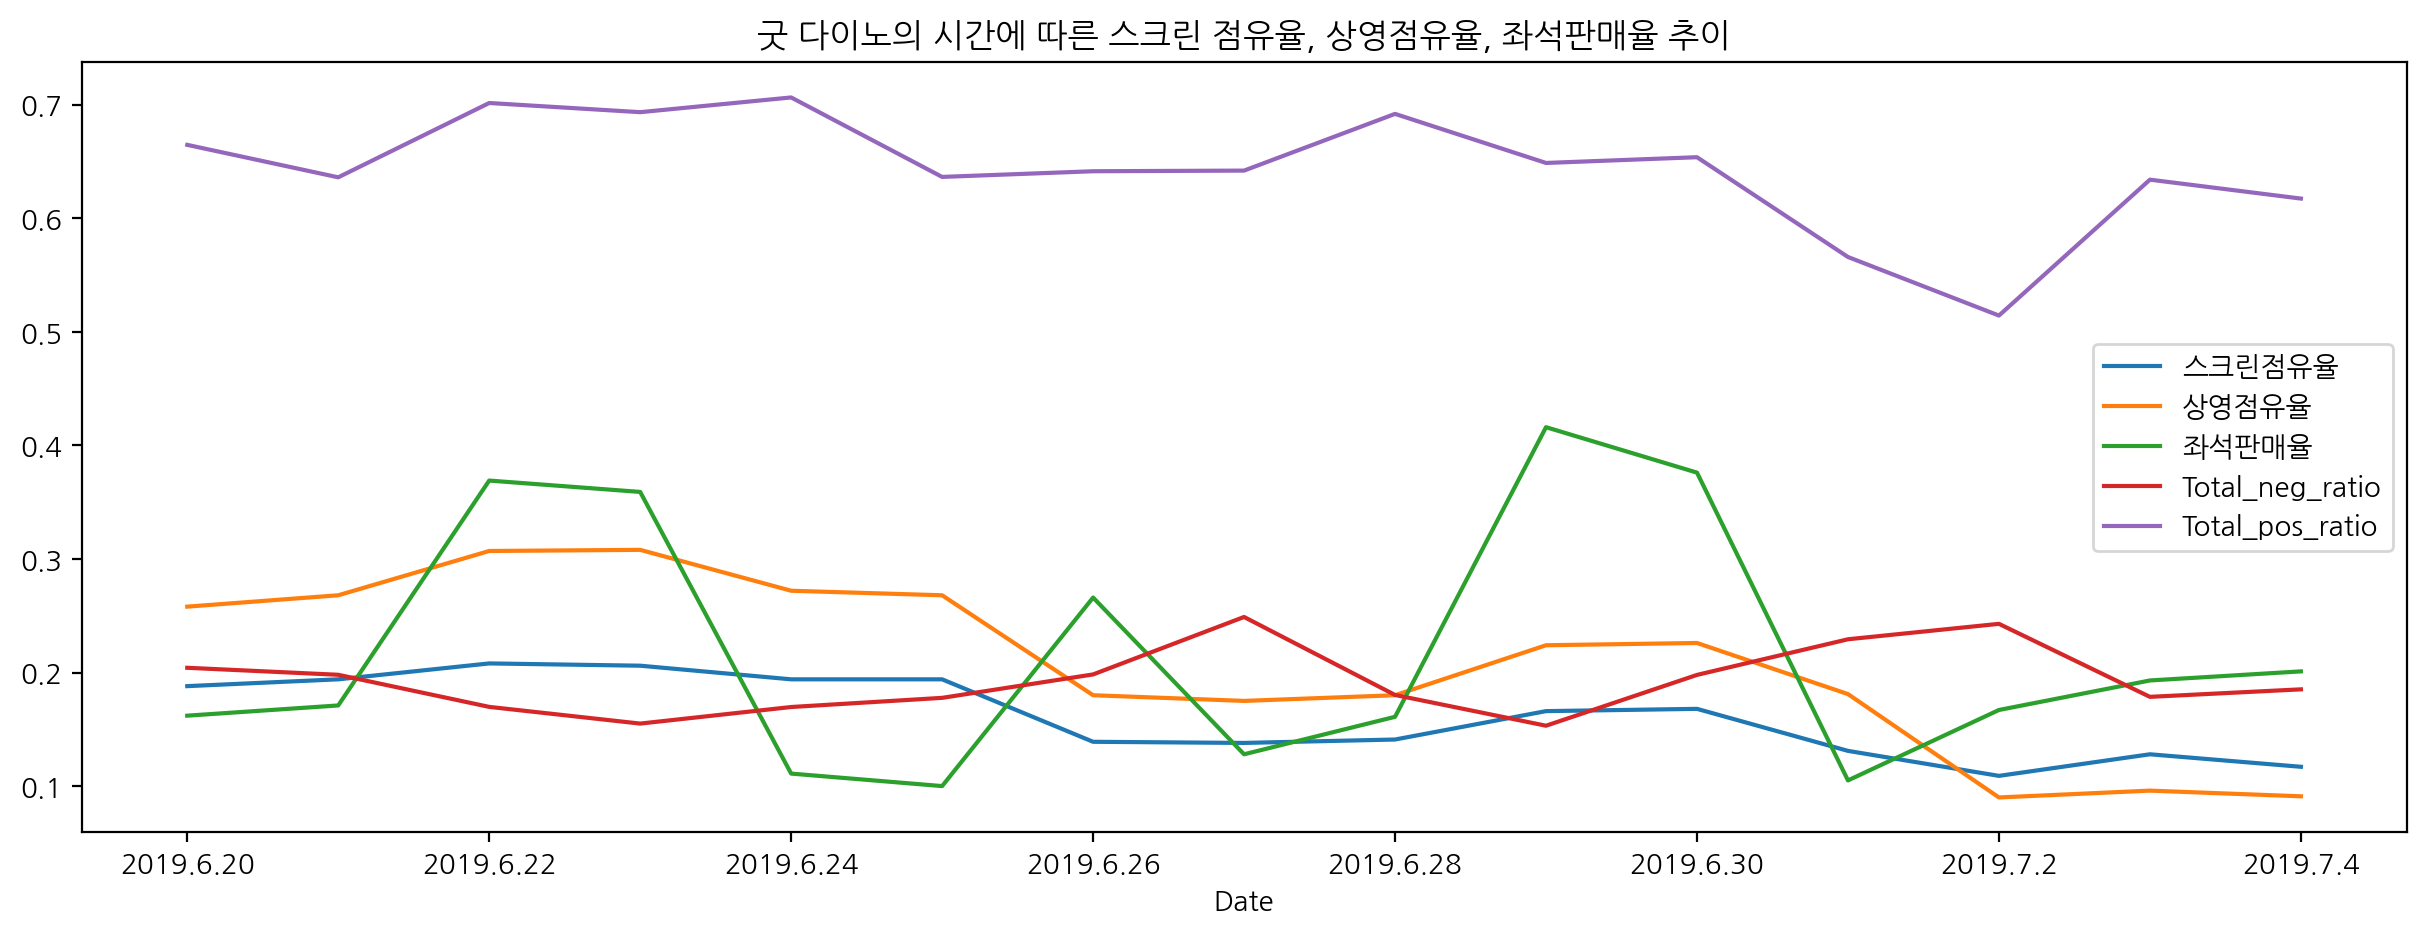

In [6]:
# 굿 다이노의 시간에 따른 스크린 점유율,상영점유율, 좌석 점유율 추이 변화
df_good_dino = df[df['movie_title'] == '토이 스토리 4'].reset_index(drop=True)
df_good_dino = df_good_dino[['Date', '스크린점유율', '상영점유율', '좌석판매율','Total_neg_ratio','Total_pos_ratio']]
df_good_dino = df_good_dino.set_index('Date')
df_good_dino.plot(figsize=(15, 5))
plt.title('굿 다이노의 시간에 따른 스크린 점유율, 상영점유율, 좌석판매율 추이')

Text(0.5, 1.0, '범죄도시의 시간에 따른 스크린 점유율, 상영점유율, 좌석판매율 추이')

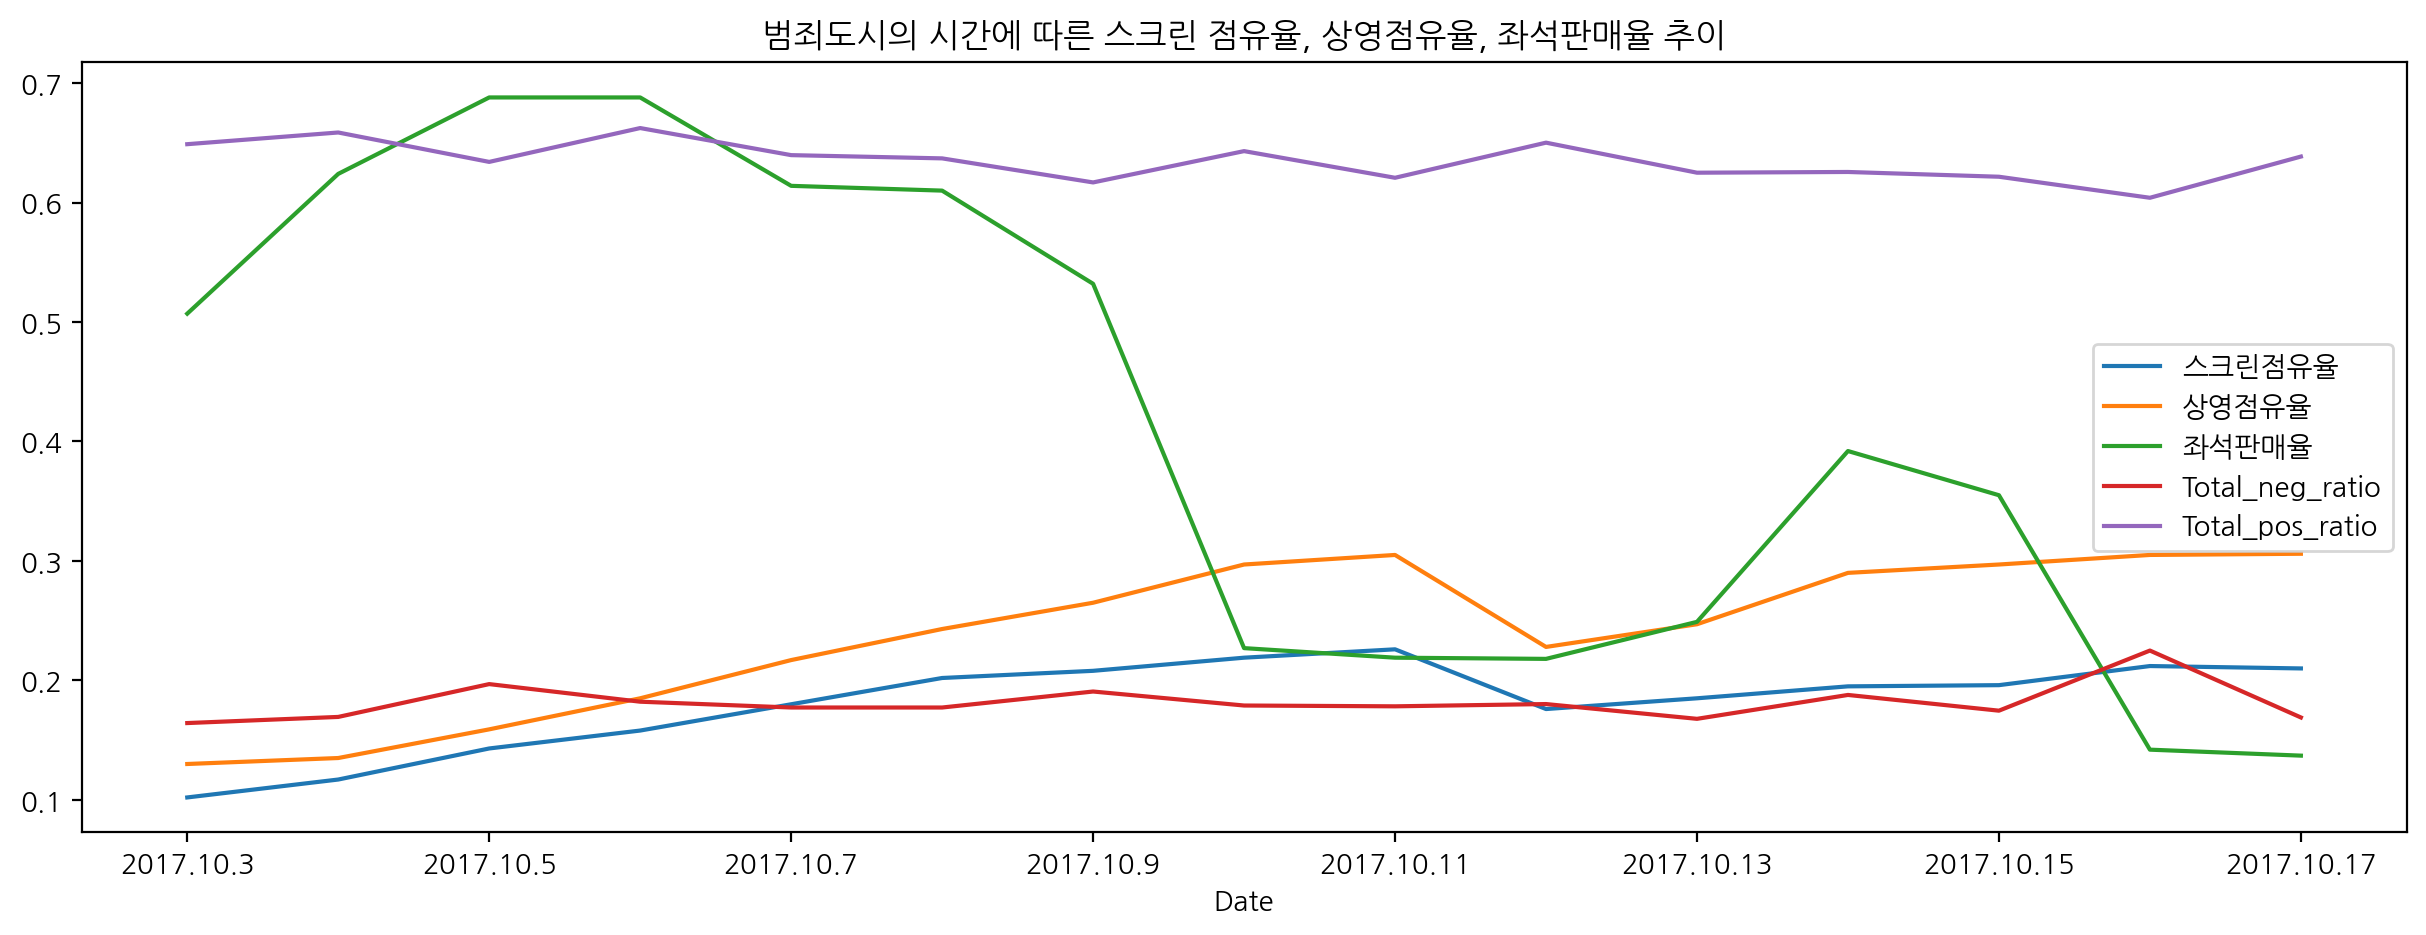

In [10]:
# 굿 다이노의 시간에 따른 스크린 점유율,상영점유율, 좌석 점유율 추이 변화
df_good_dino = df[df['movie_title'] == '범죄도시']
df_good_dino = df_good_dino[['Date', '스크린점유율', '상영점유율', '좌석판매율','Total_neg_ratio','Total_pos_ratio']]
df_good_dino = df_good_dino.set_index('Date')
df_good_dino.plot(figsize=(15, 5))
plt.title('범죄도시의 시간에 따른 스크린 점유율, 상영점유율, 좌석판매율 추이')

Text(0.5, 1.0, '군함도의 시간에 따른 스크린 점유율, 상영점유율, 좌석판매율 추이')

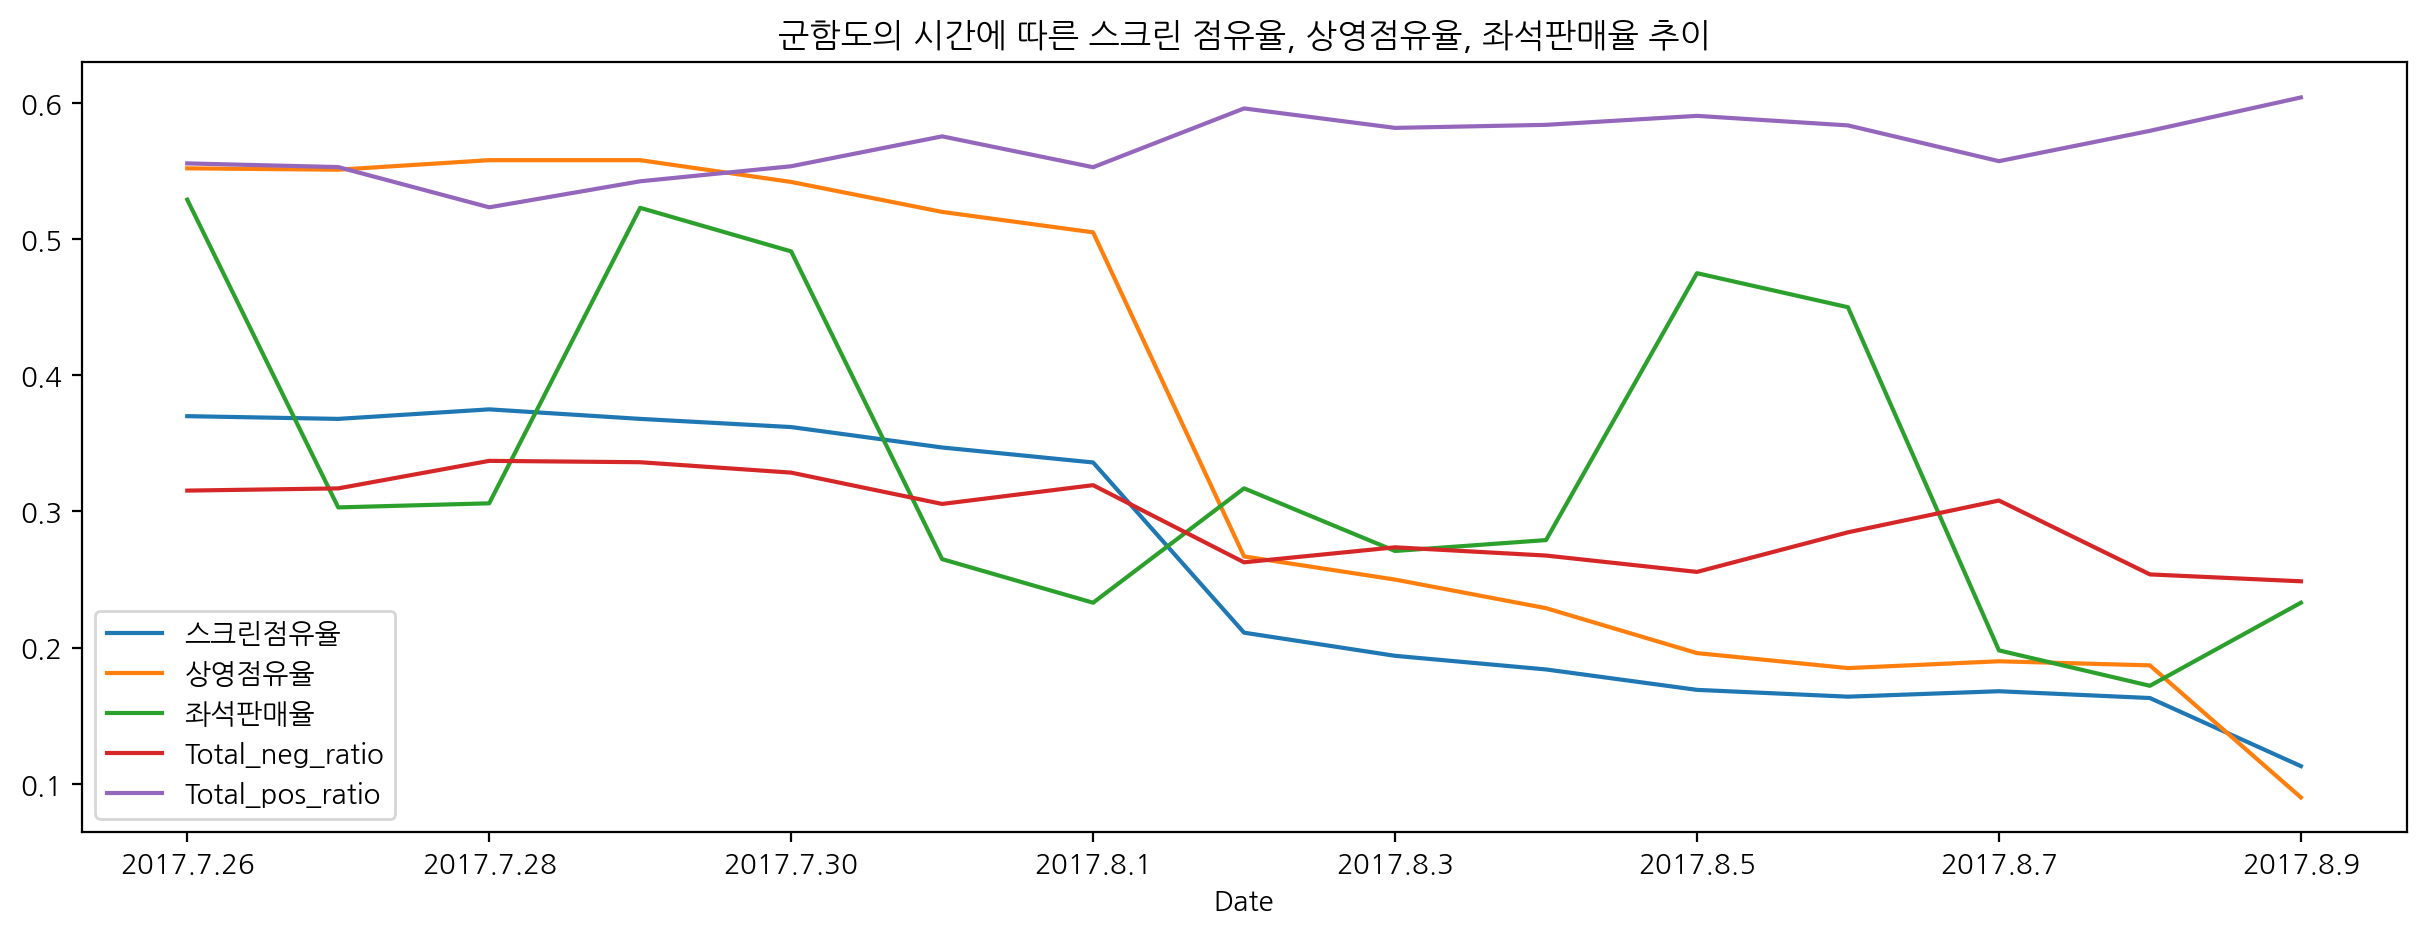

In [8]:
# 군함도의 시간에 따른 스크린 점유율,상영점유율, 좌석 점유율 추이 변화
df_good_dino = df[df['movie_title'] == '군함도']
df_good_dino = df_good_dino[['Date', '스크린점유율', '상영점유율', '좌석판매율','Total_neg_ratio','Total_pos_ratio']]
df_good_dino = df_good_dino.set_index('Date')
df_good_dino.plot(figsize=(15, 5))
plt.title('군함도의 시간에 따른 스크린 점유율, 상영점유율, 좌석판매율 추이')

* 영화사는 흥행이 예상되는 경우에, 계속해서 공격적인 마케팅을 펼친다. ->  좌석 판매율은 낮아진다. 그러나 1주차에 흥행이 예상되지 않는다면 스크린 점유율과 상영 점유율을 낮춘다. -> 좌석 판매율이 떨어지긴 하지만, 큰 폭으로 떨어지지 않는다. 

#### 배급사별 전략

In [9]:
# 배급사와 제공이 같은 영화
df[df['배급사'] == df['제공']] # 122개



,naver_movie_code,kobis_movie_code,movie_title,release_date,DoW_release,Date,DoW,MoY,D_D,DailyTotal,RV_Total,NTZ_Total,Total_Negative,RV_Negative,NTZ_Negative,Total_Neutral,RV_Neutral,NTZ_Neutral,Total_Positive,RV_Positive,NTZ_Positive,Total_Dailyscore,RV_Dailyscore,NTZ_Dailyscore,Total_neg_ratio,Total_neut_ratio,Total_pos_ratio,RV_neg_ratio,RV_neut_ratio,RV_pos_ratio,NTZ_neg_ratio,NTZ_neut_ratio,NTZ_pos_ratio,Total_Entropy,RV_Entropy,NTZ_Entropy,스크린수,스크린점유율,상영횟수,상영점유율,좌석수,좌석점유율,좌석판매율,매출액,매출액증감(전일대비),관객수,관객수증감(전일대비),누적매출액,누적관객수,순위,nationality,genre,사극,SF,어드벤처,액션,범죄,판타지,가족,미스터리,스릴러,뮤지컬,코미디,공포(호러),애니메이션,드라마,서부극(웨스턴),전쟁,멜로/로맨스,기타,다큐멘터리,공연,성인물(에로),장르1평균관객수,장르2평균관객수,장르3평균관객수,장르1평균누적관객수,장르2평균누적관객수,장르3평균누적관객수,장르1평균스크린수,장르2평균스크린수,장르3평균스크린수,장르평균관객수,장르평균누적관객수,장르평균스크린수,directors,감독군,directors_naver_code,actors,actors_naver_code,actor_power,director_power,rev_acc,RV_male,RV_female,RV_teen,RV_twenties,RV_thirties,RV_forties,RV_fifties,NTZ_score_total,NTZ_review_total,NTZ_male_score,NTZ_female_score,NTZ_teen_score,NTZ_twenties_score,NTZ_thirties_score,NTZ_forties_score,NTZ_fifties_more_score,NTZ_direct_point,NTZ_act_point,NTZ_story_point,NTZ_visual_point,NTZ_ost_point,RV_score_total,RV_review_total,RV_male_score,RV_female_score,RV_teen_score,RV_twenties_score,RV_thirties_score,RV_forties_score,RV_fifties_more_score,RV_direct_point,RV_act_point,RV_story_point,RV_visual_point,RV_ost_point,running_time,watch_grade,제작사,배급사,제공,배급사군,영화명(검색),비교영화1(검색),비교영화2(검색),비교영화3(검색),비교영화4(검색),영화명_검색량,비교영화1_검색량,비교영화2_검색량,비교영화3_검색량,비교영화4_검색량,감독평균최대관객수,log_감독평균최대관객수,감독총최대관객수,log_감독총최대관객수,배급사평균최대관객수,log_배급사평균최대관객수,배급사총최대관객수,log_배급사총최대관객수,요일평균관객수,요일평균누적관객수,요일평균스크린수,월평균관객수,월평균누적관객수,월평균스크린수,장르평균관객수.1,장르평균누적관객수.1,장르평균스크린수.1,국적평균관객수,국적평균누적관객수,국적평균스크린수,등급평균관객수,등급평균누적관람객수,등급평균스크린수,7days_before,5days_before,Day_of_release,5days_after,7days_after
0,107374,20142641,나를 잊지 말아요,2016.1.7,Thursday,2016.1.7,Thursday,January,0,612,38,574,146,10,136,66,5,61,400,23,377,7.405229,6.631579,7.456446,2.385621e-01,1.078431e-01,0.653595,2.631579e-01,1.315789e-01,6.052632e-01,0.236933798,0.106271777,0.656794425,7.828214e-01,8.393092e-01,0.778727844,503,0.092,2317,0.146,360219,0.139,0.176,482064700,475557700 ( 7308.4% ),63347,62541 ( 7759.4% ),547138700,70697,4,한국,멜로/로맨스,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2630,0,0,338514,0,0,39,0,0,2630,338514,39,이윤정,3.0,147870,"정우성, 김하늘, 배성우, 장영남, 조이진, 임주은, 허진, 이준혁","2523, 1758, 132765, 49334, 50396, 15608, 40908...",6.820599e+07,449.614747,-318.981925,43%,57%,5%,52%,27%,12%,5%,6.71,"3,600",6.67,6.85,6.76,6.37,6.74,7.12,7.81,12%,50%,38%,0%,0%,6.72,685,6.99,6.51,6.32,6.74,6.78,6.78,6.33,0%,0%,0%,0%,0%,106,15세이상관람가,(주)더블유 팩토리,씨제이이앤엠(주),씨제이이앤엠(주),3,나를 잊지 말아요,히말라야,"셜록, 유령신부","내부자들, 디 오리지널",굿 다이노,100.00000,9.13566,6.65951,37.61888,14.48984,427197.0,5.630628,427197.0,5.630628,2061850.0,6.314257,127834717.0,8.106649,5717,539355,69,11120,576831,655763,2630,338514,39,12056,859493,95,9090,596341,79,11,11,13,6,33
1,107374,20142641,나를 잊지 말아요,2016.1.7,Thursday,2016.1.8,Friday,January,1,332,50,282,78,11,67,41,13,28,213,26,187,6.930723,7.040000,6.911348,2.349398e-01,1.234940e-01,0.641566,2.200000e-01,2.600000e-01,5.200000e-01,0.237588652,0.09929078,0.663120567,8.040533e-01,9.315288e-01,0.767520013,524,0.093,2314,0.144,359876,0.136,0.155,454390900,-27673800 ( -5.7% ),55628,-7719 ( -12.2% ),1001529600,126325,4,한국,멜로/로맨스,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2630,0,0,338514,0,0,39,0,0,2630,338514,39,이윤정,3.0,147870,"정우성, 김하늘, 배성우, 장영남, 조이진, 임주은, 허진, 이준혁","2523, 1758, 132765, 49334, 50396, 15608, 40908...",6.820599e+07,449.614747,27.777830,43%,57%,5%,52%,27%,12%,5%,6.71,"3,600",6.67,6.85,6.76,6.37,6.74,7.12,7.81,12%,50%,38%,0%,0%,6.72,685,6.99,6.51,6.32,6.74,6.78,6.78,6.33,0%,0%,0%,0%,0%,106,15세이상관람가,(주)더블유 팩토리,씨제이이앤엠(주),씨제이이앤엠(주),3,나를 잊지 말아요,히말라야,"셜록, 유령신부","내부자들, 디 오리지널",굿 다이노,80.98905,27.84054,20.72169,97.23515,41.92913,427197.0,5.630628,427197.0,5.630628,2061850.0,6.314257,127834717.0,8.106649,7008,567310,73,11120,576831,655763,2630,338514,39,12056,859493,95,90